??? danger Vous êtes professeur ? Cliquez ici pour obtenir les ressources associées à ce notebook 
  
Ce notebook est conçu pour être utilisé avec des ressources (diaporama, fiche d'exercice et vidéo).

Retrouvez-les dans l'espace professeur du site [mathadata.fr](https://mathadata.fr/fr).

Pour tout retour, coquille, demande d'aide, critique, ou félicitations, contactez-nous sur [question-notebook@mathadata.fr](mailto:question-notebook@mathadata.fr).

Notebook exporté le 18-02-2026 17:38:40 
<!-- depuis le commit 427a93e -->

???


# MathAData - Géométrie du plan, équation réduite


!!! abstract Défi : reconnaissance d’images de chiffres manuscrits
Au cours de ce TP tu vas développer un algorithme d’intelligence artificielle qui estime le chiffre écrit dans une image. 
Ce genre d’algorithme sert par exemple à lire automatiquement les adresses pour trier les colis à la poste. 

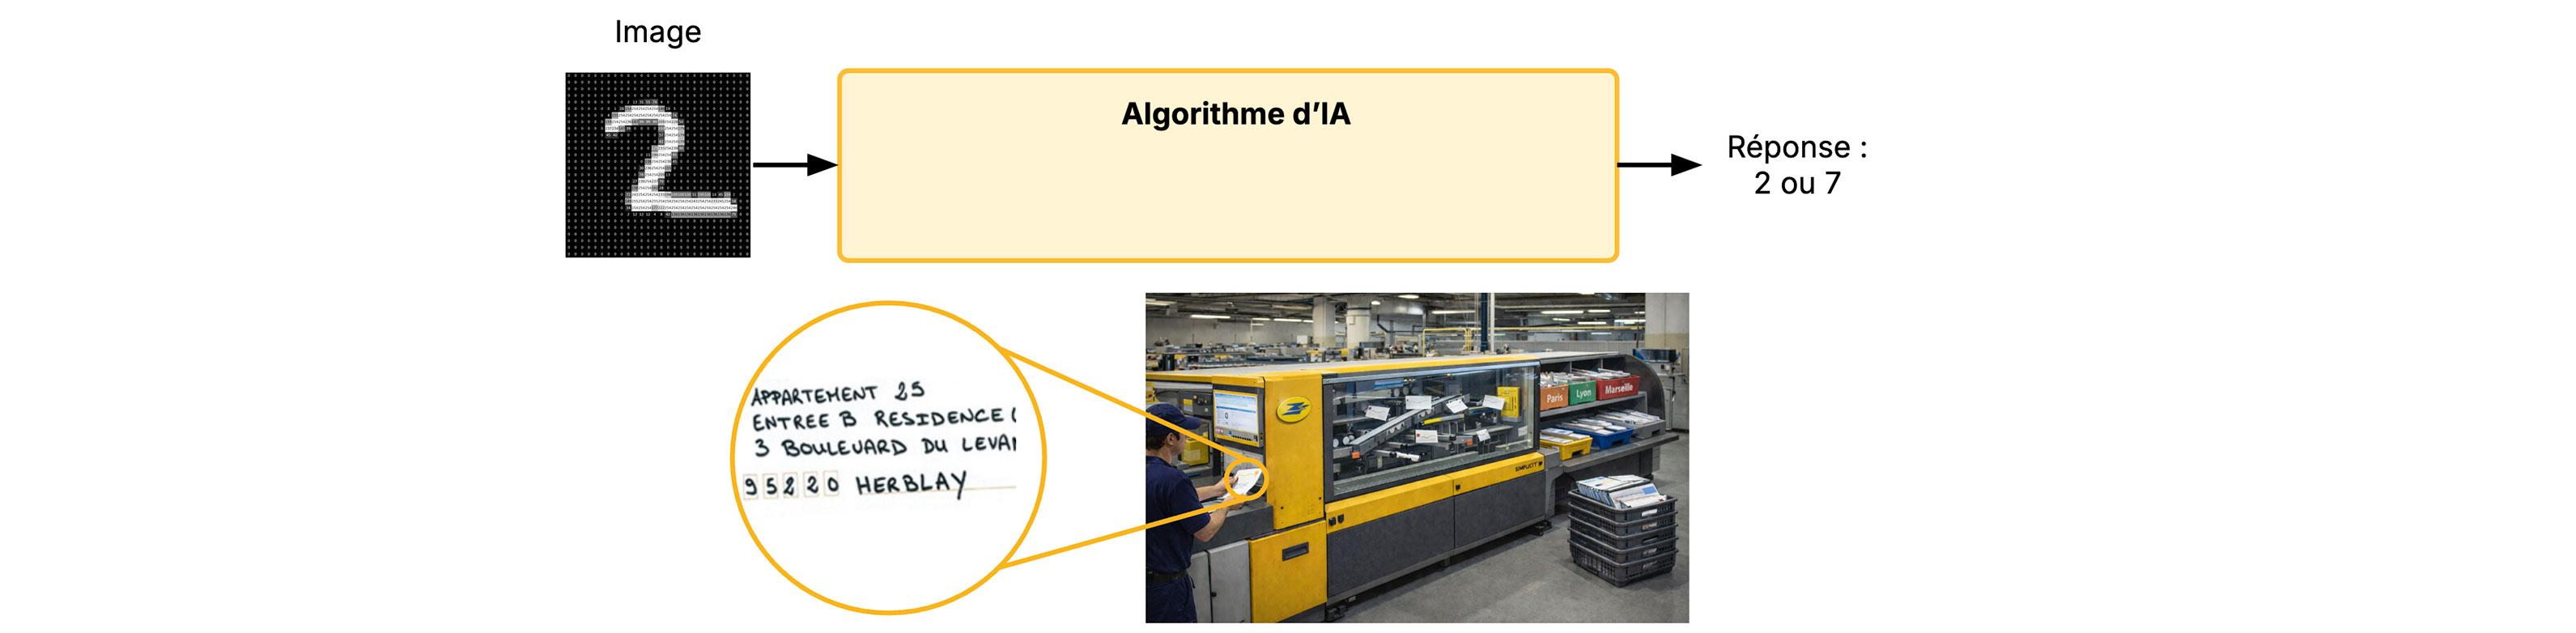  
!!!


??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


<div id="debut-etape-intro" style="height: 1px; visibility: hidden;"></div>


??? question Pour commencer, **clique dans la cellule** de code ci-dessous puis appuie dans la barre d'outils sur le bouton **Exécuter**. Rien ne se passe ? Clique ici  


### Rien ne se passe quand tu exécutes une cellule ?

**Cas 1 : La cellule n'a pas été exécutée.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">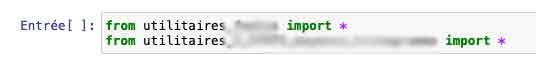</span>

**Solution :** Clique dans la cellule (sur le mot `from` par exemple) puis appuie sur le bouton **Exécuter**

 <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">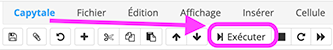</span>

 
Lorsque le code aura été exécuté, une étoile apparaîtra le temps du chargement puis un nombre entre les crochets sur la gauche

> Remarque : les numéros entre crochets (par exemple `[3]`) peuvent être dans le désordre, ce n’est pas grave.
 : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  

---

**Cas 2 : La cellule est en cours d'exécution.**  
Tu vois ceci : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">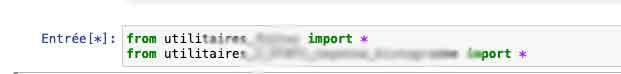</span>

**Solution :** La base de données se charge. Patiente jusqu'à une minute.

---

**Cas 3 : Rien ne fonctionne malgré les solutions ci-dessus ?**  

**Solution :** Relance le notebook depuis le début :

1. Clique sur le bouton **deux petites flèches** <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">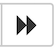</span> dans la barre d'outils en haut du notebook


2. Clique ensuite sur le bouton rouge **"Relancer et exécuter toutes les cellules"**
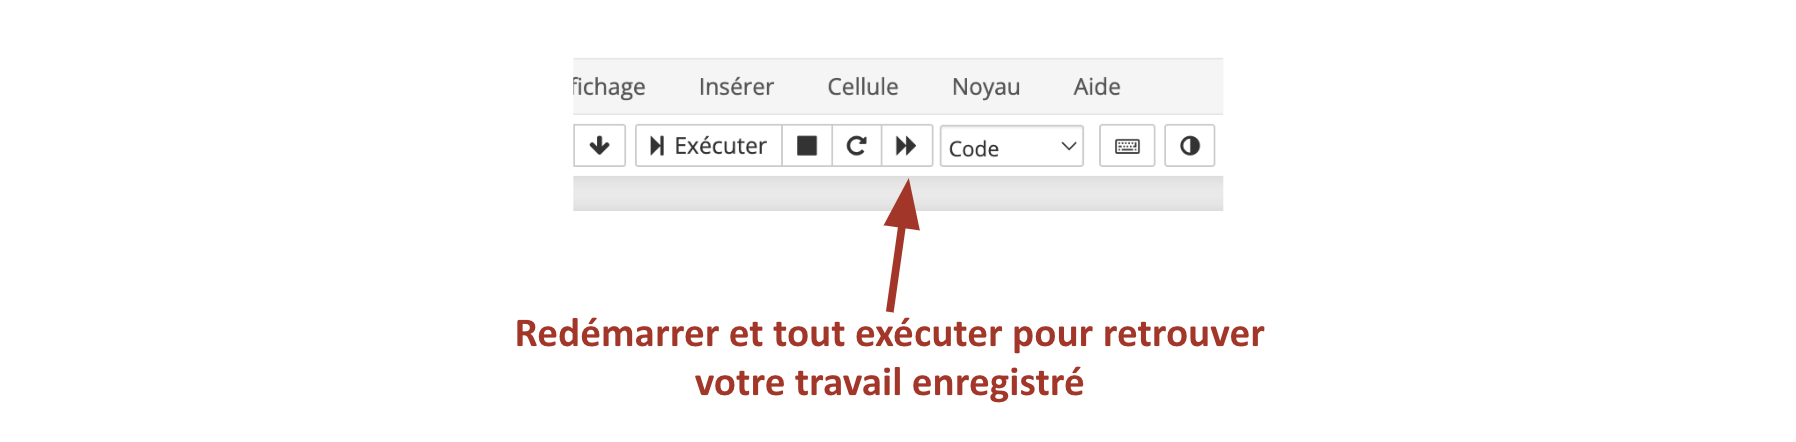  

???


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter dans la barre d'outils 

from utilitaires_mnist import *
from utilitaires_S_GEO_equation_reduite import *

<div id="debut-etape-data" style="height: 1px; visibility: hidden;"></div>


## A. Étape 1 : Images numériques


!!! abstract Qu'est-ce qu'une image numérique ?  
C’est un tableau de nombres qui donne le niveau de gris de chaque pixel de l’image. Un pixel noir vaut 0, un pixel blanc vaut 255, et un gris a une valeur intermédiaire. 

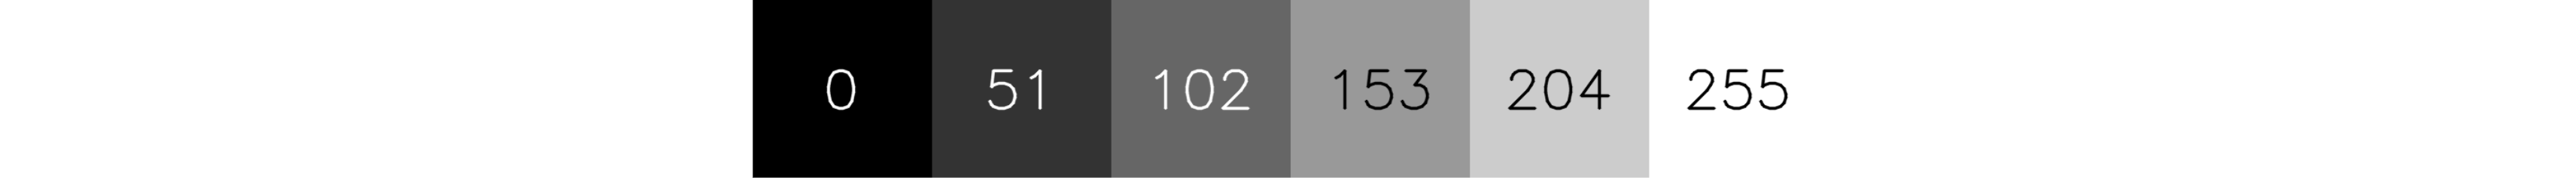  
**Exécute la cellule suivante pour voir un exemple d’image.**  
!!!


In [ ]:
affichage_image_et_pixels()
question_pixel()

??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


## B. Étape 2 : Points caractéristiques dans le plan


<div id="debut-etape-carac" style="height: 1px; visibility: hidden;"></div>


### Nombres caractéristiques


!!! tip Nombres caractéristiques

Pour différencier les images de 2 et de 7, on va utiliser une caractéristique $x$. 
C'est un nombre calculé à partir des pixels de l’image **qui prend des valeurs différentes selon que l’image est un 2 ou un 7**. 

Par exemple, on va calculer **la moyenne des pixels dans un rectangle**. On choisit un rectangle où les valeurs des images des 2 et des 7 sont généralement différentes. Observons ces deux images : 

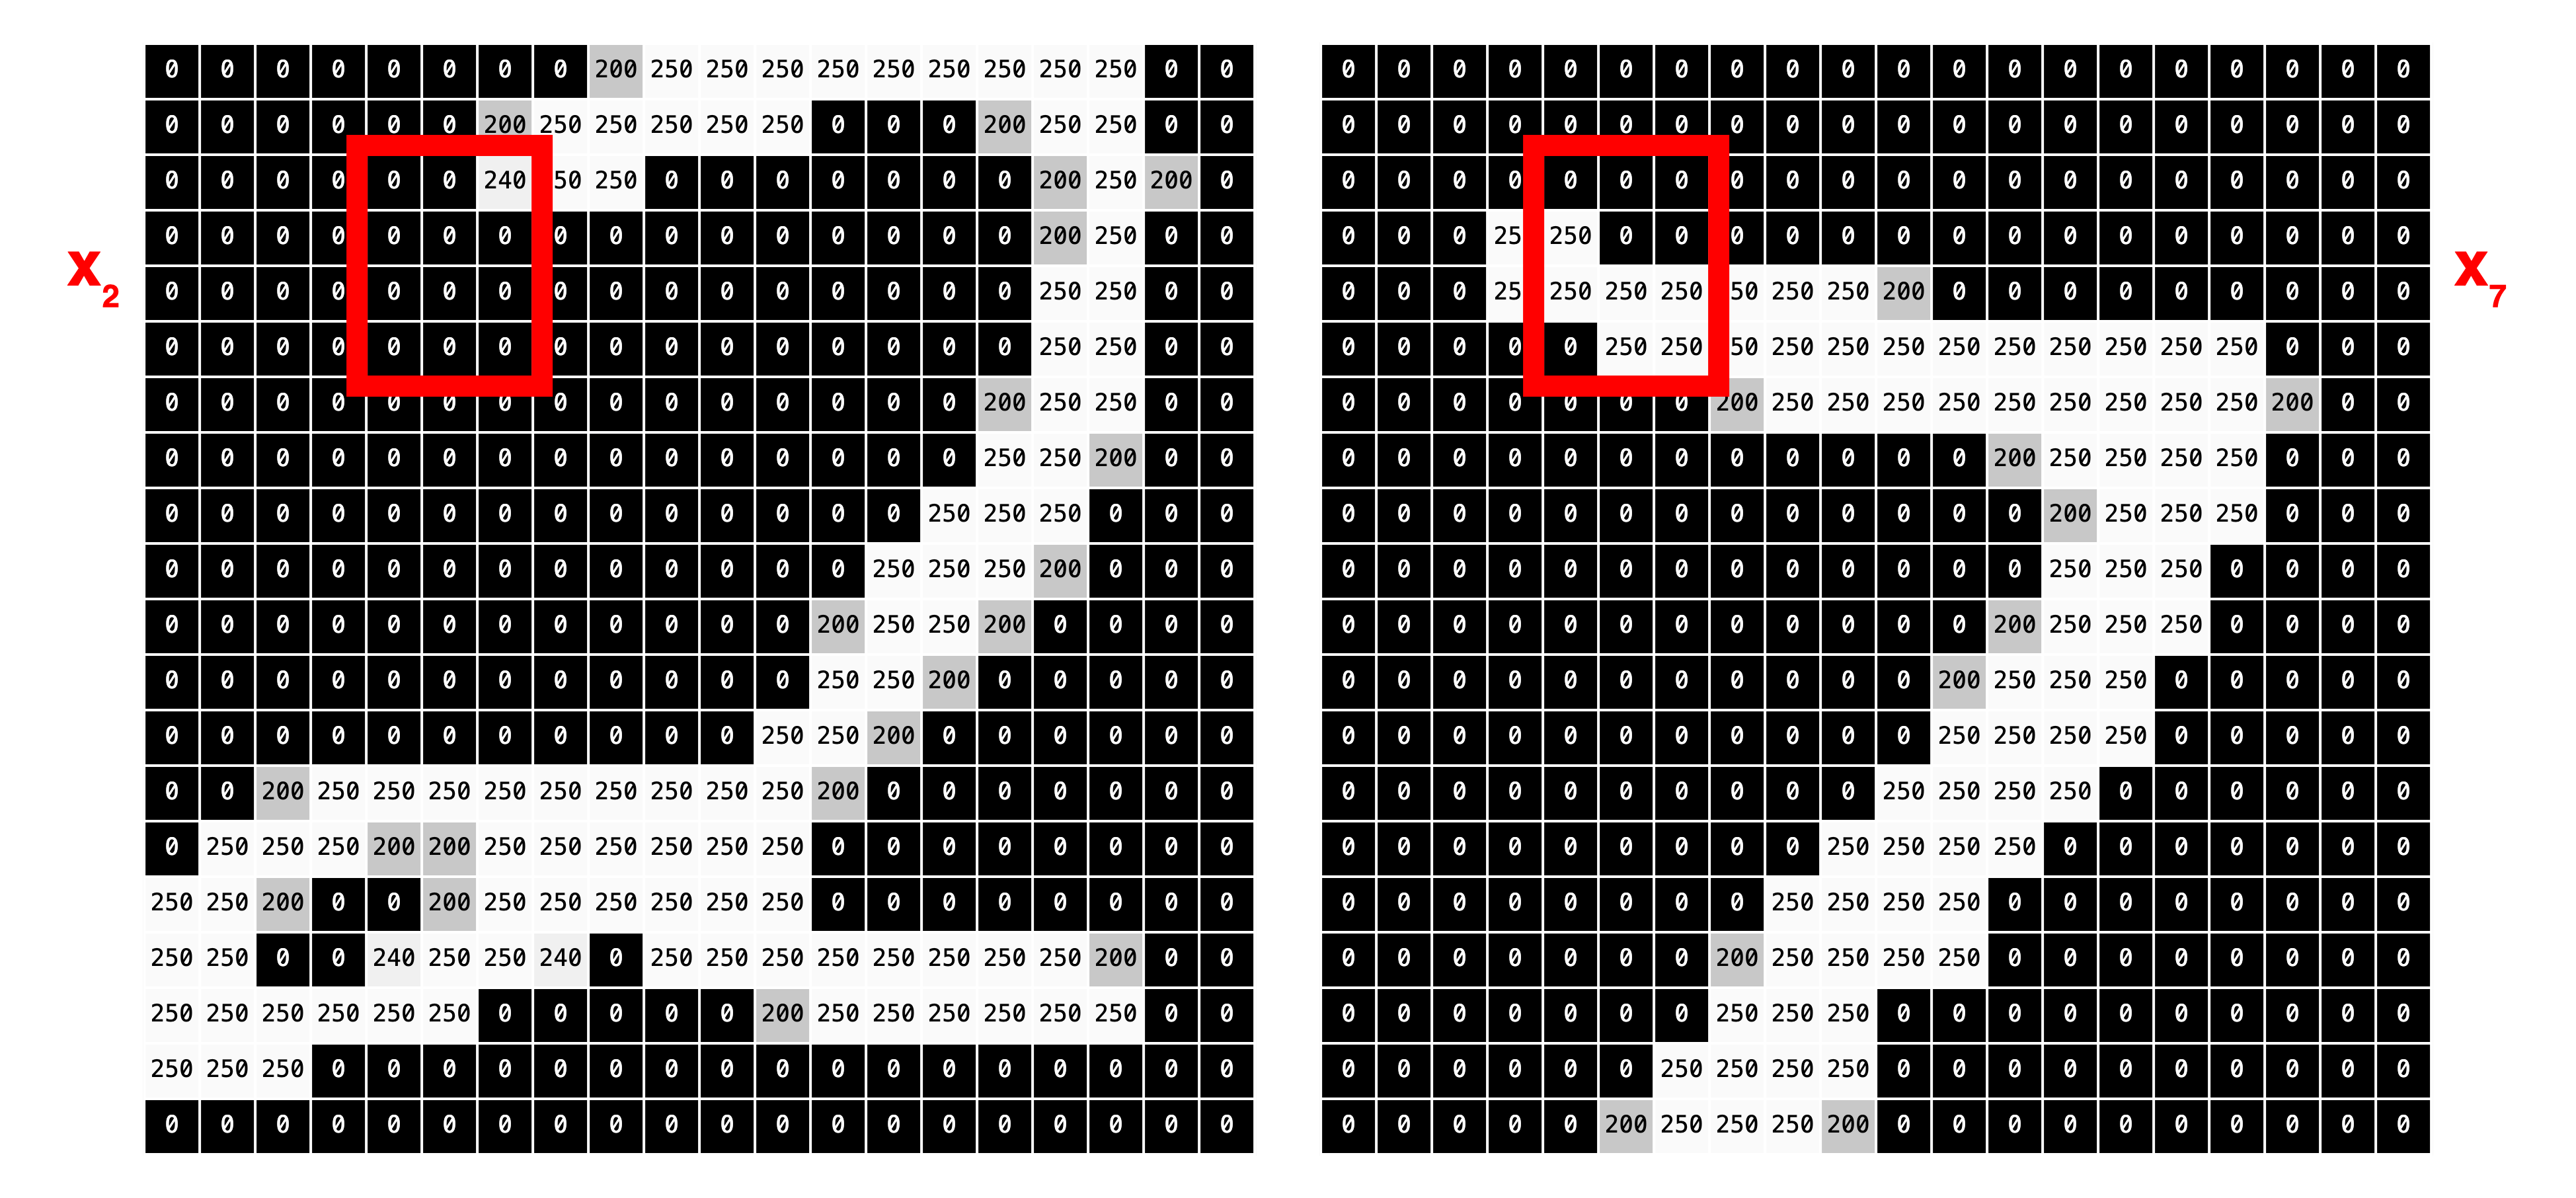
!!!


!!! question 1) Calcule la caractéristique de l'image du chiffre 7.

La caractéristique $x$ est la moyenne des pixels dans le rectangle rouge. 

Voici le calcul de la caractéristique de l'image de 2 ci-dessus : $$x_2 = \frac{1 \times 240}{12} = 20$$


De même, calcule la caractéristique $x_7$ de l'image de 7.
**Efface les `...`** dans la cellule, écris ta réponse à la place, **puis exécute**.
!!!


In [ ]:
# Efface les ... et écris à la place ta réponse

x_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_carac_x()

In [ ]:
qcm_1_cara_mnist()

!!! warning Une caractéristique ne suffit pas toujours
Voici une autre image de 2 (la troisième image) :
    
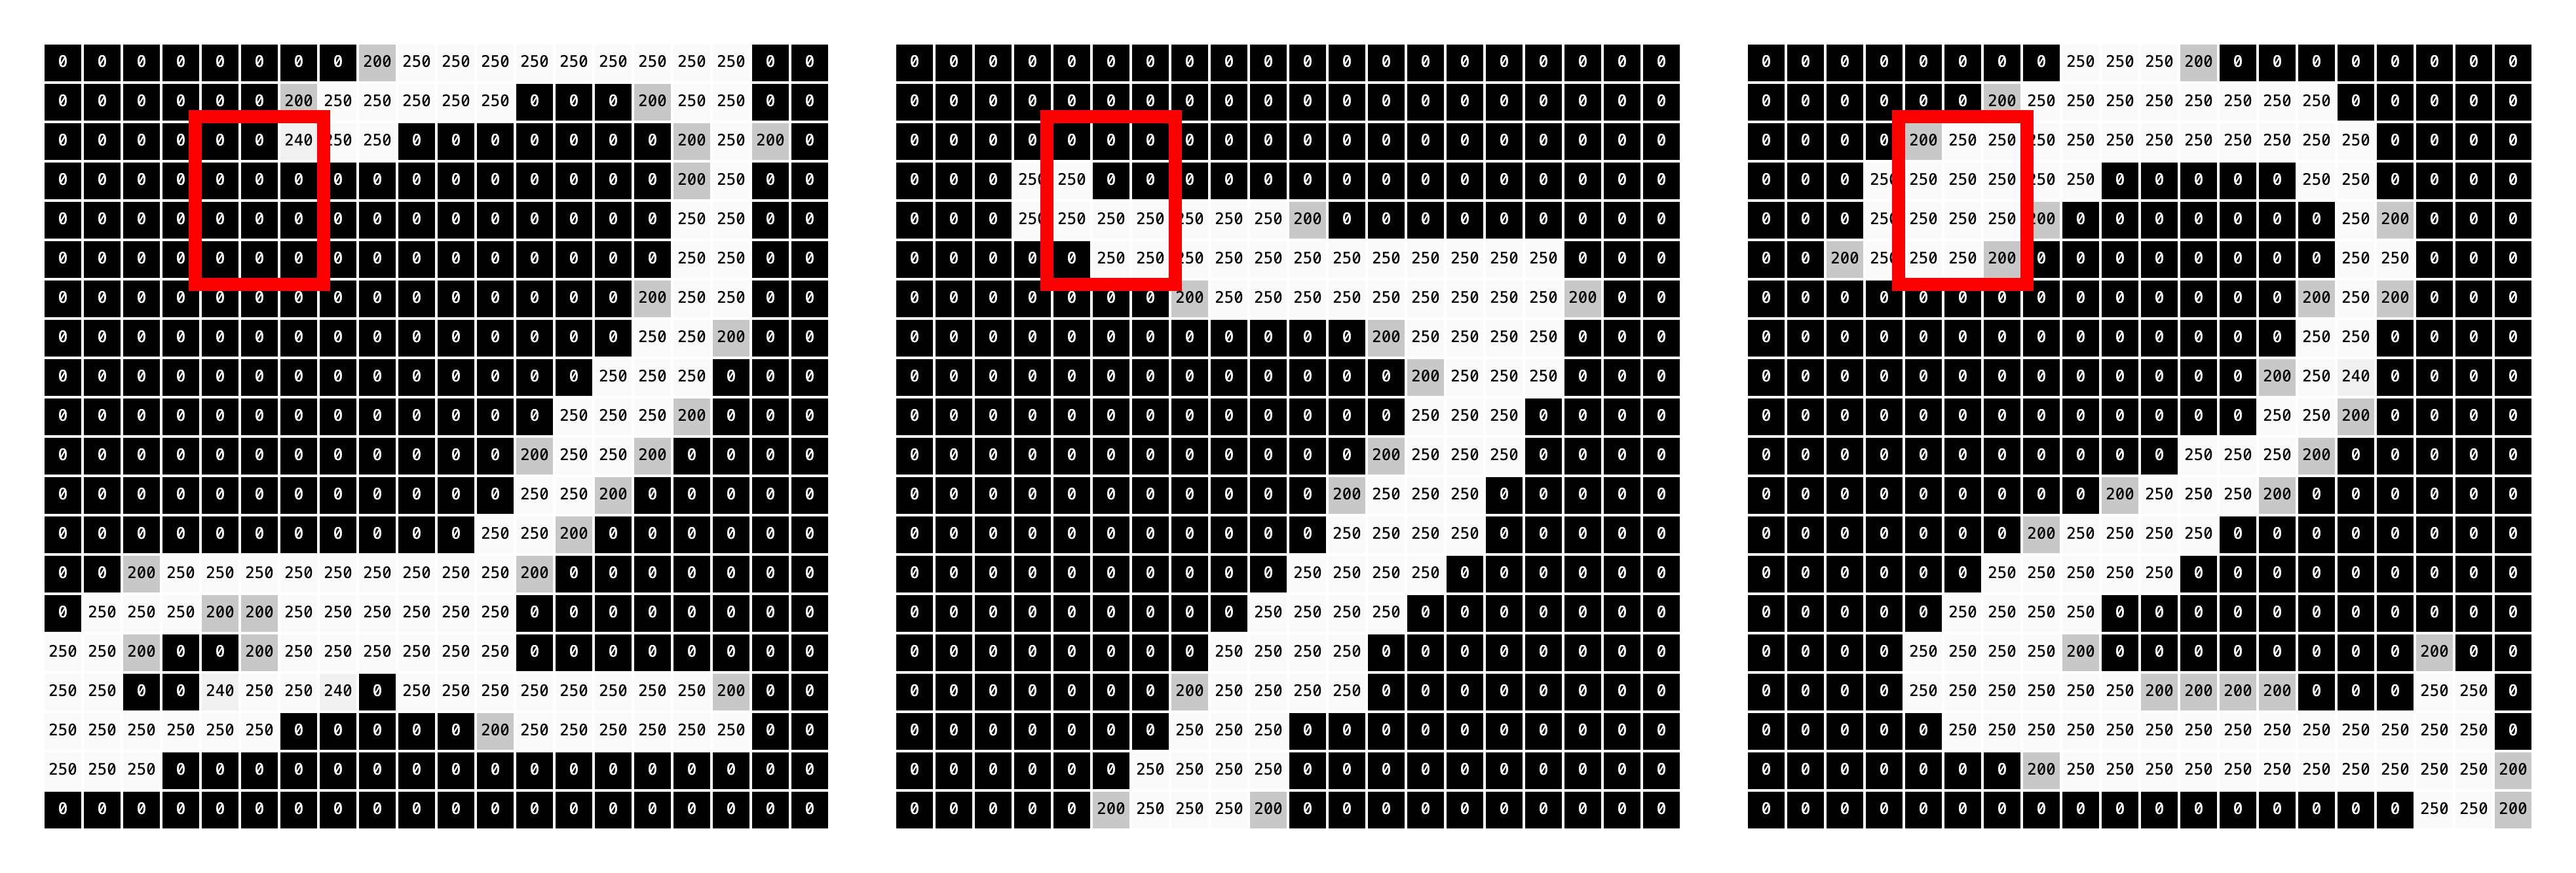
!!!


In [ ]:
qcm_contre_exemple_mnist()

!!! tip Utiliser une deuxième caractéristique
Pour avoir plus d'informations sur l'image, on va calculer une deuxième caractéristique $y$. C'est la moyenne des pixels dans un autre rectangle, en bleu cette fois-ci.

À la fin du TP, ce sera à toi de chercher des rectangles qui donnent des valeurs de $x$ et $y$ **plus différentes** entre les images de 2 et les images de 7.

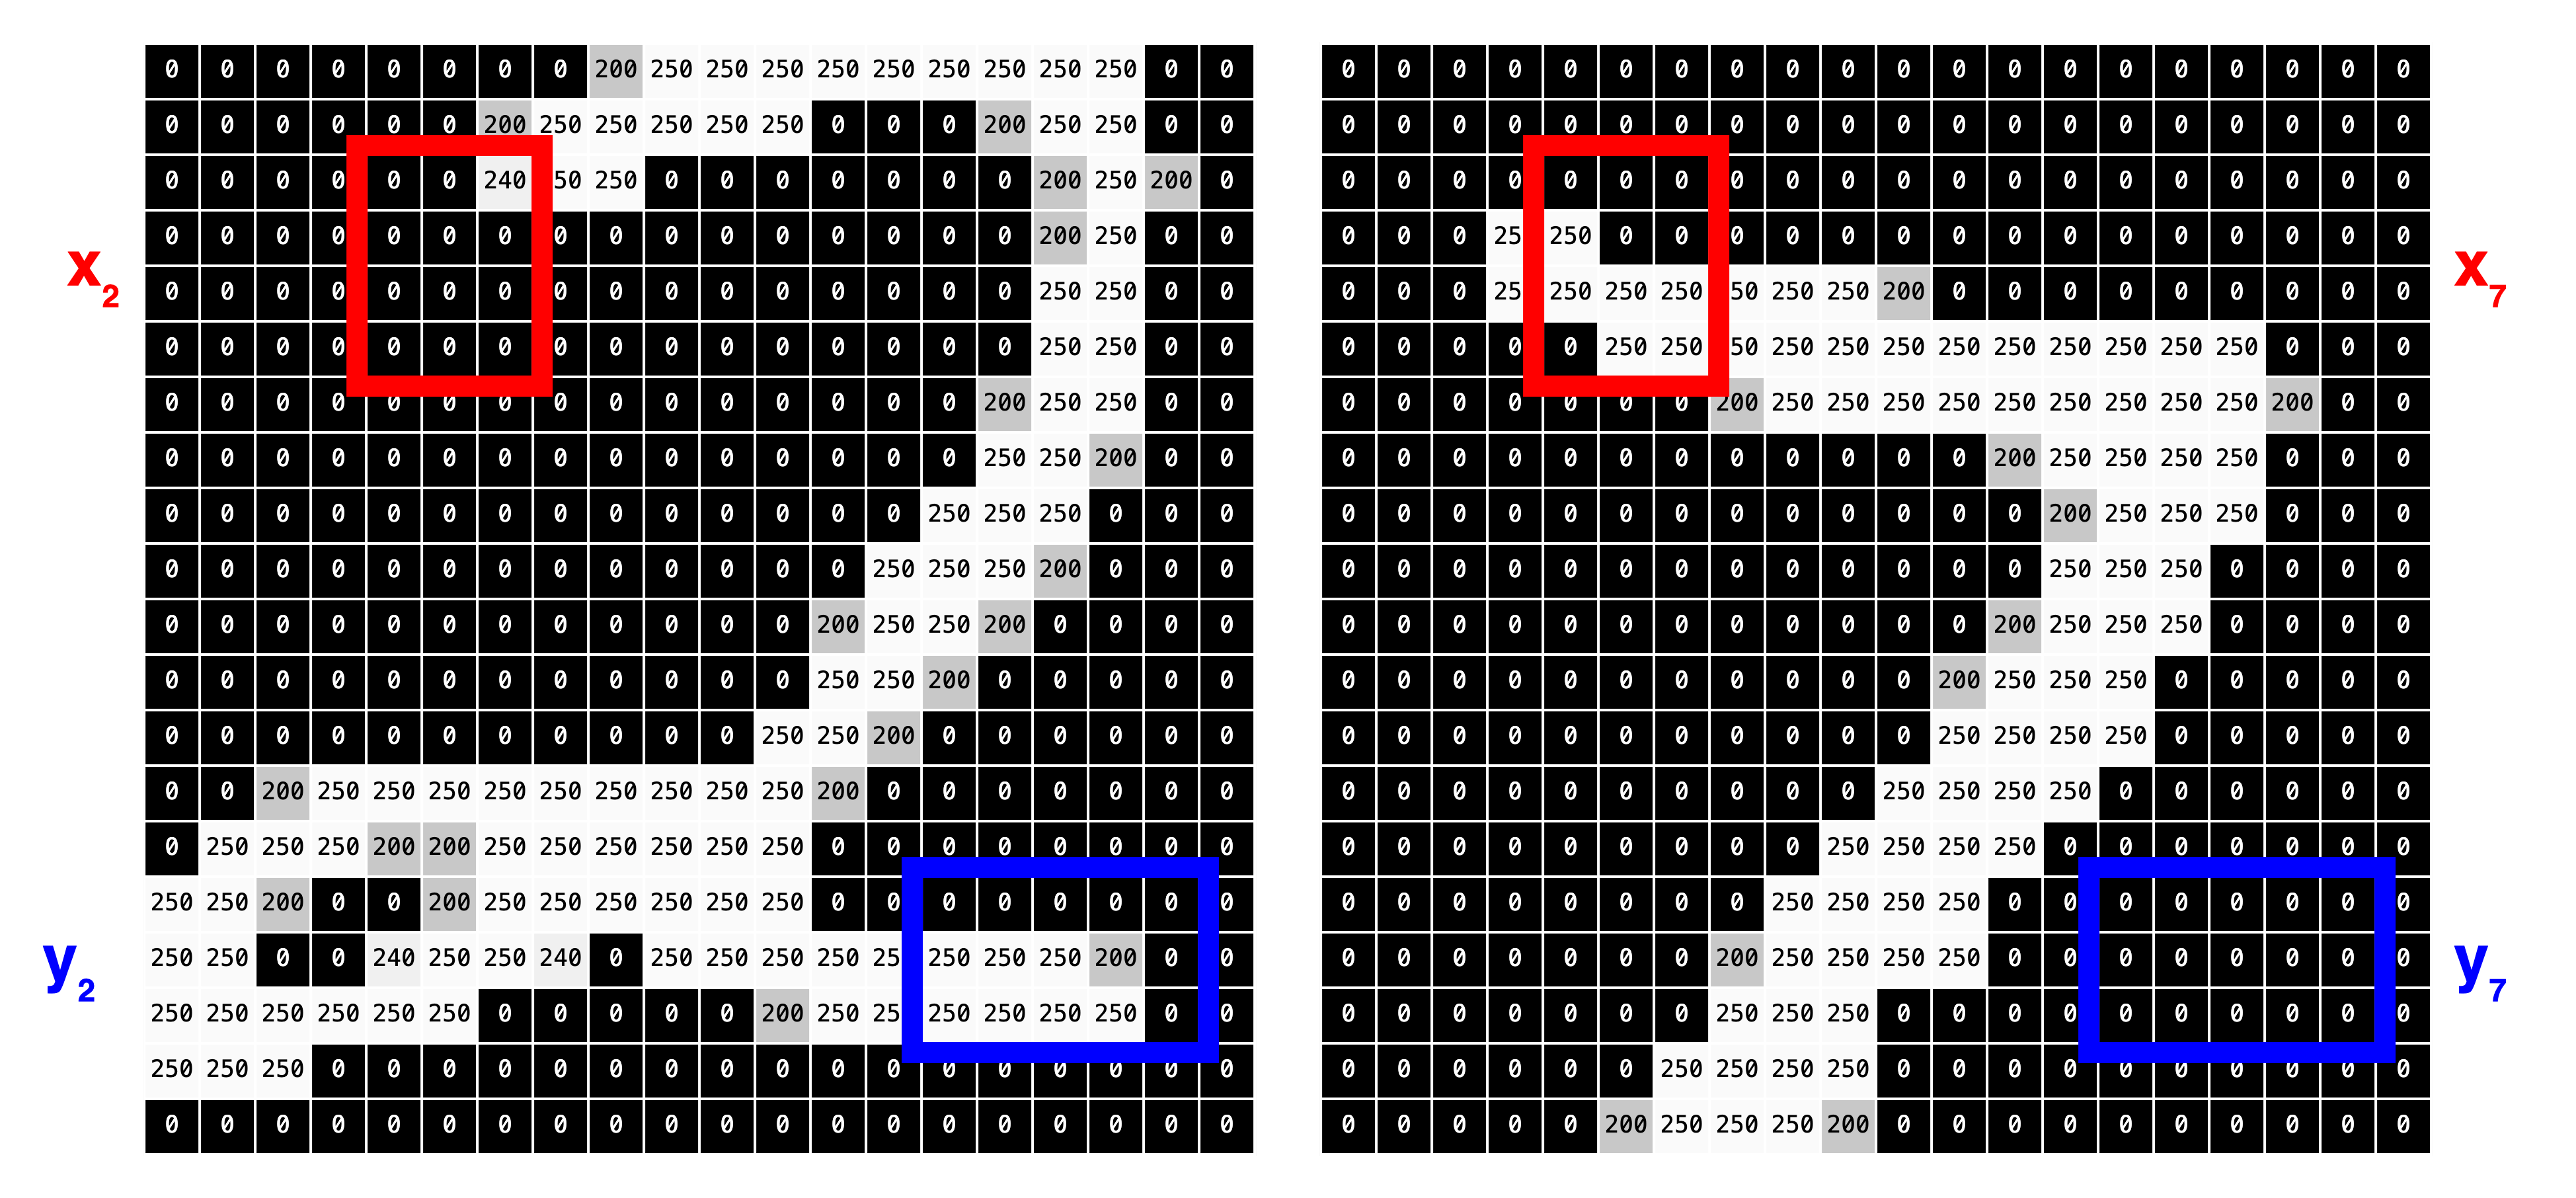
!!!


!!! question 2) Calcule la caractéristique $y$ de l'image de 7.

La caractéristique $y$ est la moyenne des pixels dans le rectangle bleu.

Note : Pense à enregistrer régulièrement en cliquant sur <button class='fa fa-save icon-save btn btn-xs btn-default'></button> pour ne pas perdre ton travail.

**Efface les `...`** dans la cellule, écris ta réponse à la place, **puis exécute**.
!!!


In [ ]:
# Efface les ... et écris à la place ta réponse

y_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_carac_y()

!!! info Les deux caractéristiques de référence

À partir de maintenant pour toutes les images on prend comme caractéristique de référence les moyennes sur les deux rectangles rouges et bleus. 

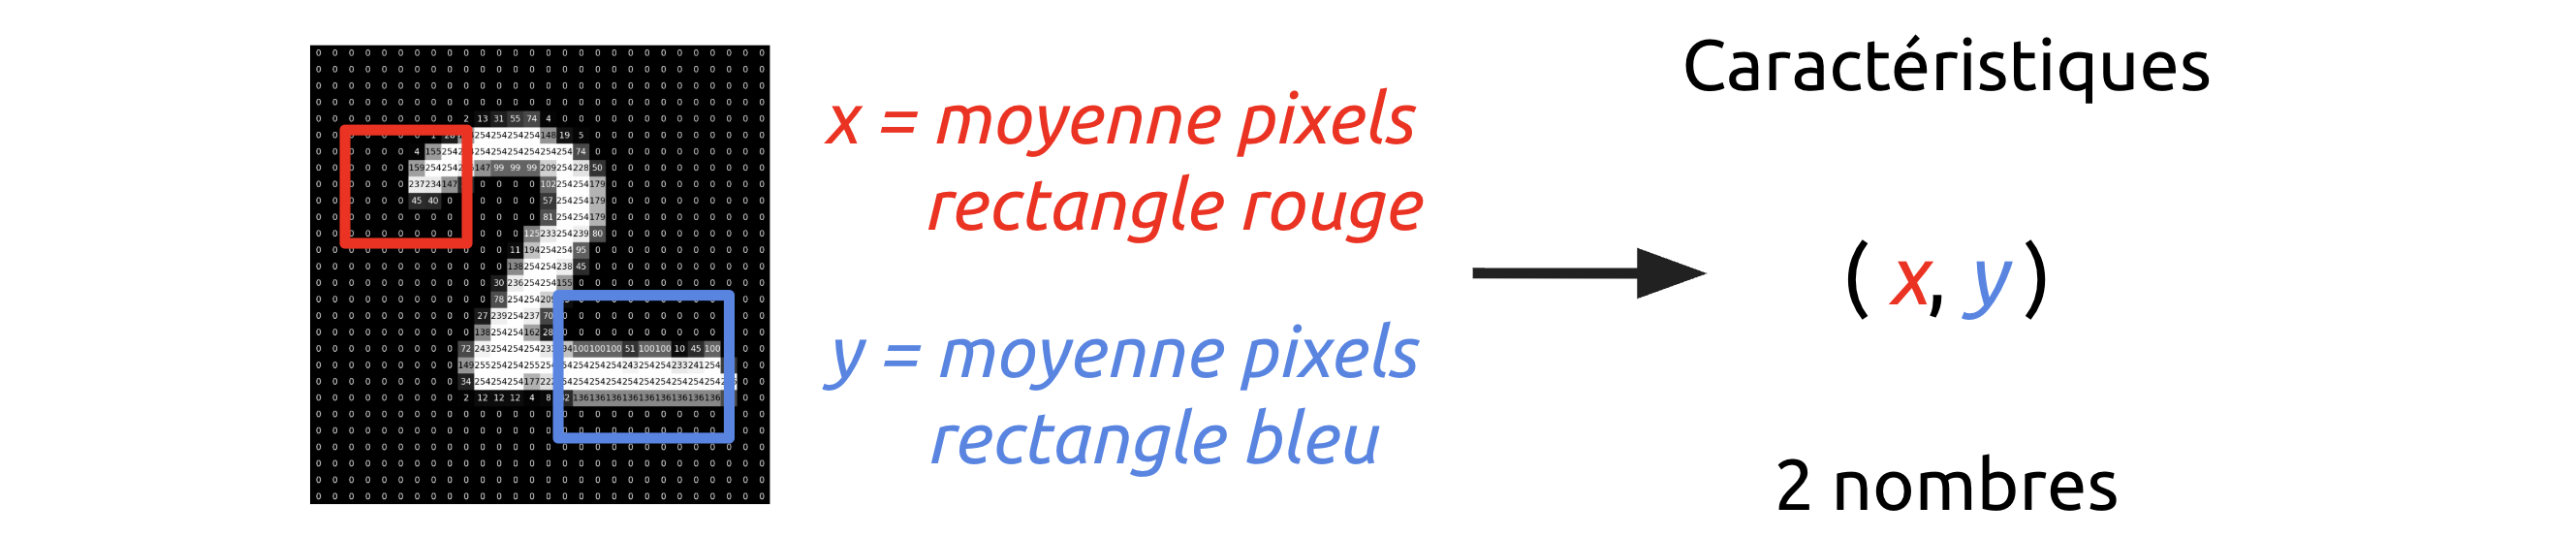

À la fin de ce TP tu vas chercher des rectangles qui différencient encore mieux les images ! 
!!!

include lien_tp_feuille


### Représentation dans le plan


!!! tip Représenter une image par son point caractéristique
Chaque image est représentée par un point caractéristique $C$ de coordonnées $(x ; y)$.

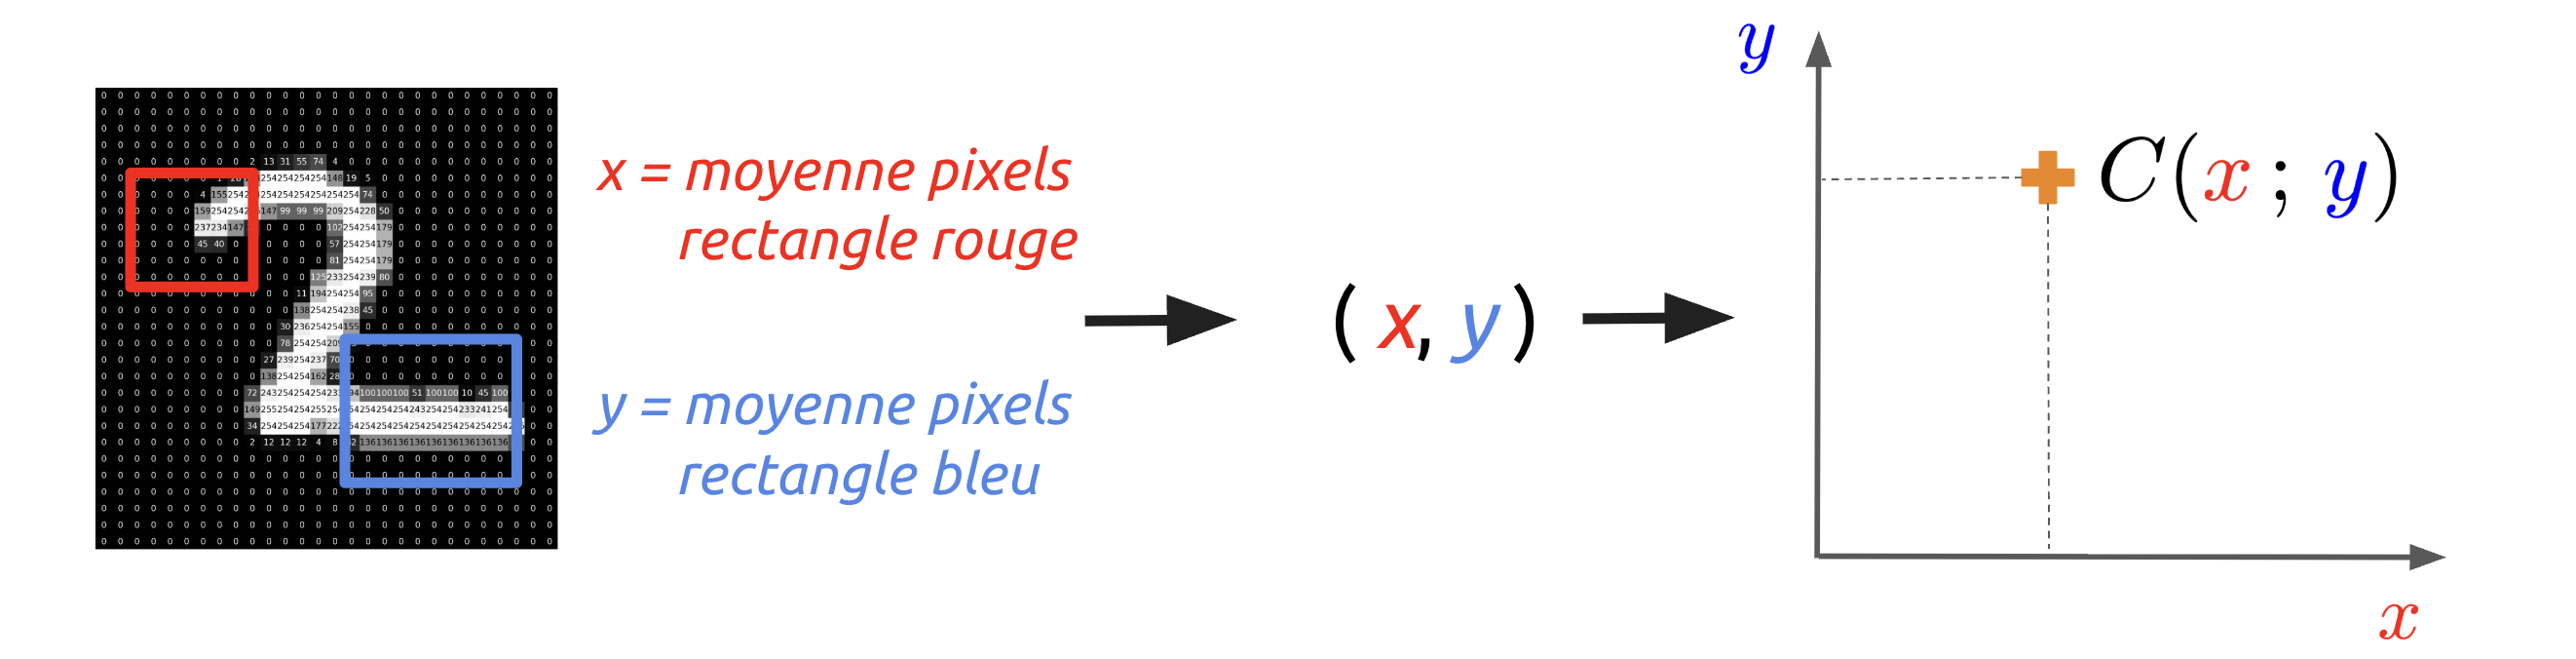

**Exécute la cellule suivante** pour poursuivre.
!!!


!!! question 3) Place les points $A$ et $B$ dans le plan.

On a calculé les caractéristiques de deux images. Pour placer un point, **clique avec ta souris sur un point du plan quadrillé ci-dessous**.

**Clique dans la cellule ci-dessous puis exécute-la**, puis place les points.
!!!


In [ ]:
placer_2_points()
validation_execution_placer_2_points()

In [ ]:
validation_placer_2_points()

!!! tip Points associés aux images d'entraînement
Un algorithme d’IA est modifié lors de la phase d’apprentissage afin de réduire les erreurs qu’il fait sur une liste d’images d’entraînement. La liste d’images d’entraînement indique si chaque image est un **2** ou un **7**.

Dans le tableau, les caractéristiques sont notées **$x$** (en rouge) et **$y$** (en bleu).

**Clique dans la cellule ci-dessous puis exécute-la** pour afficher la liste d’exemples. Le tableau est interactif.
!!!


In [ ]:
# Clique dans cette cellule de code puis appuie sur le bouton Exécuter
affichage_banque_horizontale(show_carac=True, carac=2, window=6)
validation_execution()

In [ ]:
points_connus_animation()

### Estimer le chiffre d'une image grâce aux exemples d'entraînement


!!! question 4) Comment estimer le chiffre dans une nouvelle image ?
On veut estimer le chiffre écrit dans une nouvelle image. On commence par calculer ses deux caractéristiques $x$ et $y$ : 

$x = 40$ et $y = 60$

On a donc les coordonnées du point caractéristique associé à l’image : $C(40 ; 60)$.

Pour placer un point, **clique avec ta souris sur un point du plan quadrillé ci-dessous**.

**Clique dans la cellule ci-dessous puis exécute-la**, puis place le point $C$.
!!!


In [ ]:
# Exécute cette cellule pour afficher la suite

exercice_image_mystere()

In [ ]:
mystere_qcm()

## C. Étape 3 : Séparer avec une droite


<div id="debut-etape-classif" style="height: 1px; visibility: hidden;"></div>


### Une droite pour séparer les points dans le plan


!!! tip Droite pour séparer le plan en 2 zones
Pour estimer le chiffre, l’algorithme utilise une droite d’équation $y = mx + p$ pour séparer le plan en deux zones.

**Clique dans la cellule ci-dessous puis exécute-la** pour afficher la droite et les zones.
!!!


In [ ]:
exercice_image_mystere_droite()

In [ ]:
mystere_qcm()

!!! abstract Algorithme complet  
Pour estimer le chiffre d’une image, l’algorithme calcule les coordonnées de son point caractéristique. Ensuite il répond **2** si le point caractéristique est **au-dessus** de la droite, car c’est là que les 2 sont majoritaires dans la liste d’entraînement. Sinon il répond **7**.


<div style="max-width: 520px; margin: 0.75rem auto 1rem auto; padding: 0.9rem 1.1rem; border: 1px solid rgba(0,0,0,0.12); border-radius: 12px; background: rgba(255,255,255,0.85); text-align: left;">
  <div style="font-weight: 700; text-align: center; margin-bottom: 0.5rem;">Algorithme :</div>
  <ul style="margin: 0; padding-left: 1.2rem;">
  <li>Calculer les coordonnées du point caractéristique <strong>C(x<sub>C</sub> ; y<sub>C</sub>)</strong>.</li>
  <li>Si <strong>C</strong> est au-dessus de la droite alors<br/>
    <span style="display:inline-block; margin-left: 1.2rem;">répondre <strong>2</strong></span>
  </li>
  <li>Sinon<br/>
    <span style="display:inline-block; margin-left: 1.2rem;">répondre <strong>7</strong></span>
  </li>
</ul>

</div>

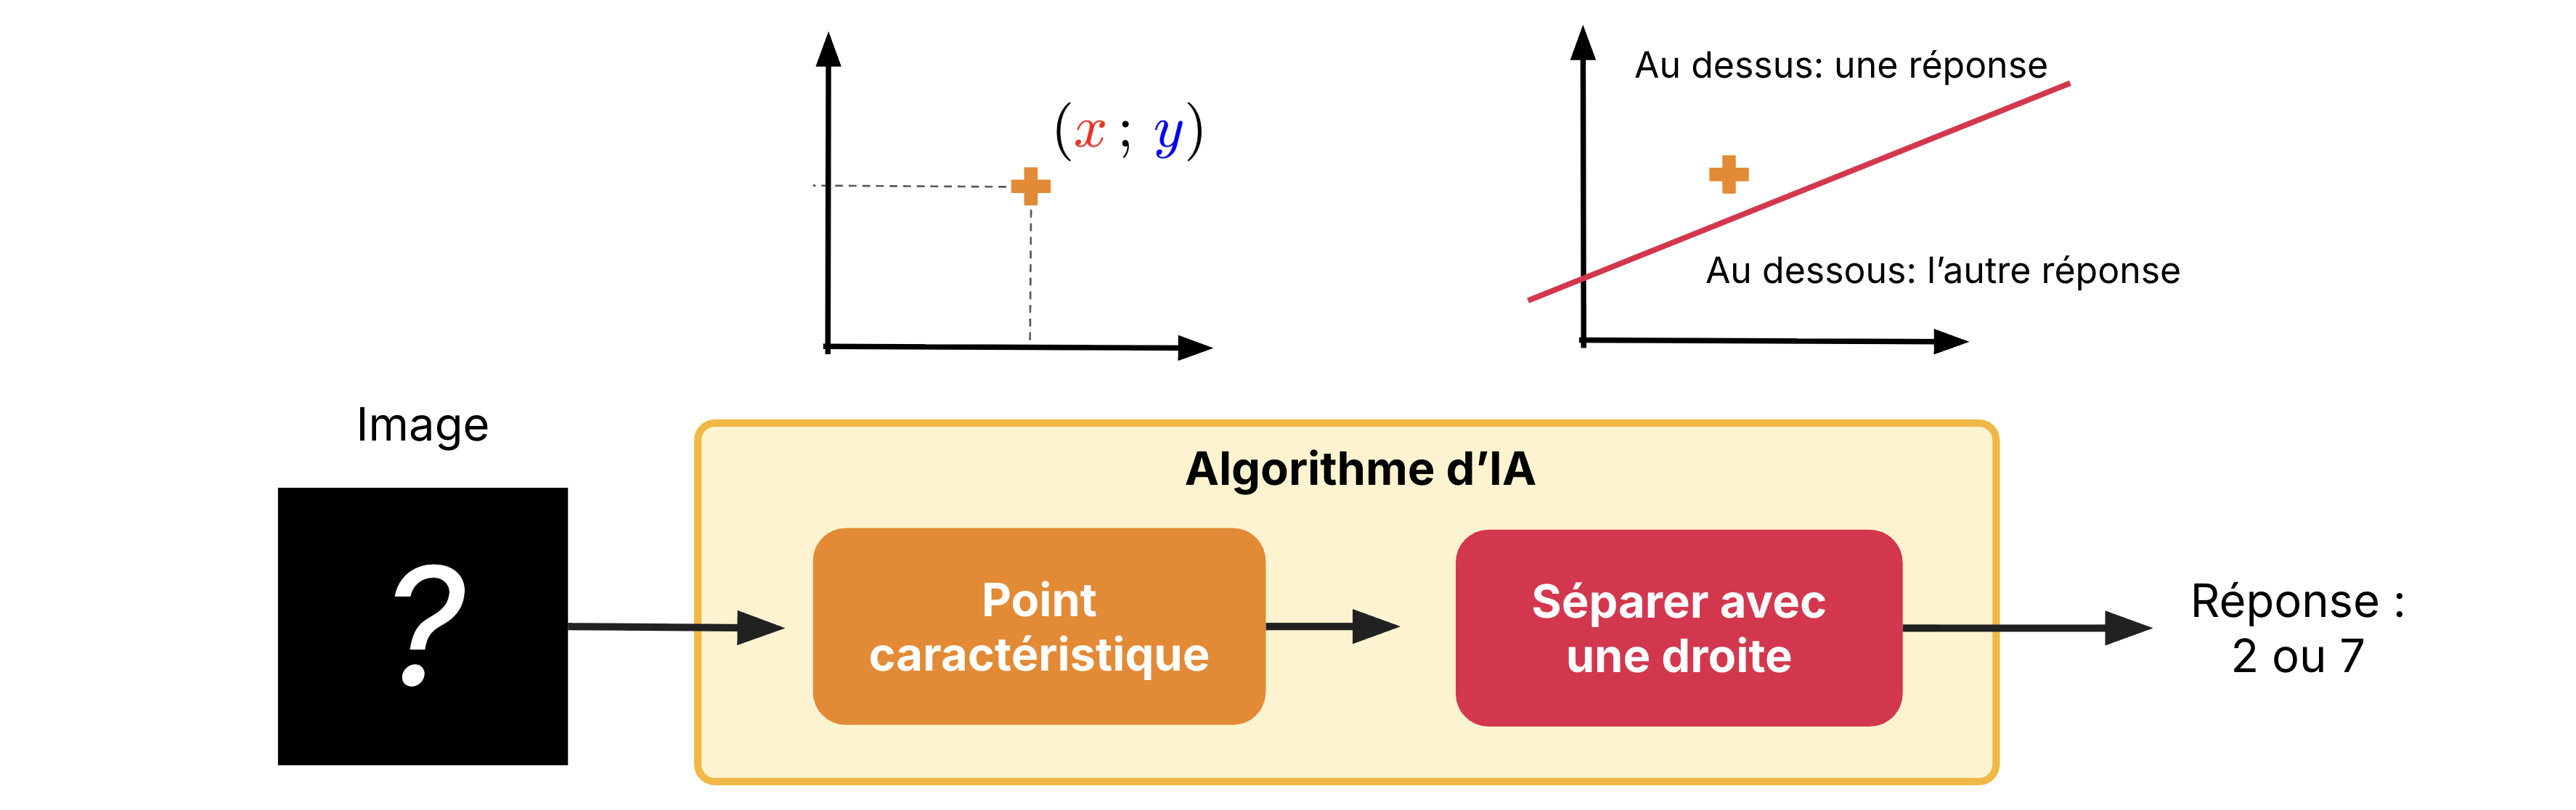  
!!!


### Calculer la position d'un point par rapport à la droite de séparation


!!! info Comment l'algorithme fait-il pour savoir si un point est au-dessus de la droite ?  
Pour déterminer si un point est au-dessus ou au-dessous de la droite, l’algorithme doit faire un calcul à partir de ses coordonnées et de l’équation de la droite.

**Clique dans la cellule ci-dessous puis exécute-la** pour voir un exemple.
!!!


In [ ]:
exercice_calcul_au_dessus()
validation_execution_point_droite()

!!! question 5) Quelles sont les coordonnées du point $M$ ?
On veut calculer si le point $C(20, 40)$ est au-dessus ou en-dessous de la droite d’équation $y = 0.5x + 20$.

On introduit le point $M(x_M, y_M)$ :
- il a la même abscisse que $C$ : $x_M = x_C = 20$ ;
- il appartient à la droite

En remplaçant $x_M$ dans l’équation, calcule $y_M$ puis complète la cellule de code ci-dessous.
**Clique dans la cellule, remplace les `...`, puis exécute.**
!!!


In [ ]:
y_M = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_equation()

??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


!!! question 6) Quelles sont les coordonnées du point $M$ pour une nouvelle image ?
Une nouvelle image a comme point caractéristique $C(30, 10)$. On veut savoir si c'est un **2** ou un **7**. 

De même qu'à la question précédente, le point $M$ a la même abscisse $x_M$ que $C$ et appartient à la droite. Calcule son ordonnée $y_M$ et déduis la position du point $C$ par rapport à la droite.

**Clique dans la cellule suivante, remplace les `...`, puis exécute.**
!!!


In [ ]:
y_M = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_equation_dessous()

In [ ]:
qcm_dessous()

??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


In [ ]:
qcm_dessus_dessous()

!!! abstract Algorithme complet avec calcul de la position
Pour estimer le chiffre d’une image, l’algorithme calcule les coordonnées de son point caractéristique. Ensuite il calcule la position du point par rapport à la droite : 


<div style="max-width: 520px; margin: 0.75rem auto 1rem auto; padding: 0.9rem 1.1rem; border: 1px solid rgba(0,0,0,0.12); border-radius: 12px; background: rgba(255,255,255,0.85); text-align: left;">
  <div style="font-weight: 700; text-align: center; margin-bottom: 0.5rem;">Algorithme :</div>
  <ul style="margin: 0; padding-left: 1.2rem;">
    <li>Calculer les coordonnées du point caractéristique <strong>C(x<sub>C</sub> ; y<sub>C</sub>)</strong>.</li>
    <li>Si <strong>y<sub>C</sub> &gt; m × x<sub>C</sub> + p</strong> alors<br/>
      <span style="display:inline-block; margin-left: 1.6rem;">répondre <strong>2</strong></span>
    </li>
    <li>Sinon<br/>
      <span style="display:inline-block; margin-left: 1.6rem;">répondre <strong>7</strong></span>
    </li>
  </ul>
</div>

!!!


<div id="debut-etape-apprendre" style="height: 1px; visibility: hidden;"></div>


## D. Étape 4 : Apprendre à faire moins d'erreurs


### Calcul du pourcentage d'erreur


In [ ]:
tracer_20_points_droite()
validation_execution_tracer_20_points_droite()

!!! question 7) Quel est le pourcentage d'erreur sur ce schéma ?
Calcule le pourcentage d'erreur pour ces 20 images et cette droite. Les points au-dessus de la droite sont classés comme 2 par l'algorithme et ceux en dessous comme 7.
**Remplace les `...`** dans la cellule suivante par ta réponse (uniquement le nombre sans le %) **puis exécute**.  
!!!


In [ ]:
erreur_20 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_20()

### Modifier une droite grâce à son équation


!!! info Diminuer l'erreur avec l'ordonnée à l'origine de la droite
Pour réduire l'erreur, on cherche une droite qui sépare mieux les deux nuages de points. On commence par changer l'ordonnée à l'origine $p$.

**Clique dans la cellule ci-dessous puis exécute-la** pour observer comment la droite $y = mx + p$ se déplace quand on modifie $p$.
!!!


In [ ]:
tracer_20_points_droite_p()
validation_execution_tracer_20_points_droite_p()

!!! question 8) Quelle est l'ordonnée à l'origine de la droite qui donne le pourcentage d’erreur minimum ?
Déplace le curseur rouge pour trouver une droite qui donne le **plus petit pourcentage d'erreur**.

En regardant l'équation de la droite, **remplace les `...`** dans la cellule suivante par la valeur de l'ordonnée à l'origine $p$ de cette droite, **puis exécute**.
!!!


In [ ]:
p = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_p()

!!! info Diminuer davantage l'erreur avec le coefficient directeur
On peut aussi faire varier le coefficient directeur $m$ pour obtenir un **pourcentage d'erreur minimum**.

**Clique dans la cellule ci-dessous puis exécute-la** pour observer comment la droite $y = mx + p$ se déplace quand on modifie $m$.
!!!


In [ ]:
tracer_20_points_droite_pm()
validation_execution_tracer_20_points_droite_pm()

!!! question 9) Quelles sont les paramètres de la droite qui donne le pourcentage d’erreur minimum ?
À nouveau, cherche la droite qui donne le **plus petit pourcentage d'erreur** en faisant varier les deux paramètres $m$ et $p$.

**Remplace les `...`** dans la cellule suivante par les valeurs du coefficient directeur $m$ et de l'ordonnée à l'origine $p$ pour cette droite, **puis exécute**.
!!!


In [ ]:
m = ...
p = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite_pm()

??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


!!! question 10) Quel est le signe du coefficient directeur ?
Pour chaque droite $d_1$, $d_2$, $d_3$, indique si son coefficient directeur $m$ est **positif**, **négatif** ou **nul**.

**Exécute successivement les trois cellules de QCM ci-dessous** et réponds à chaque question.

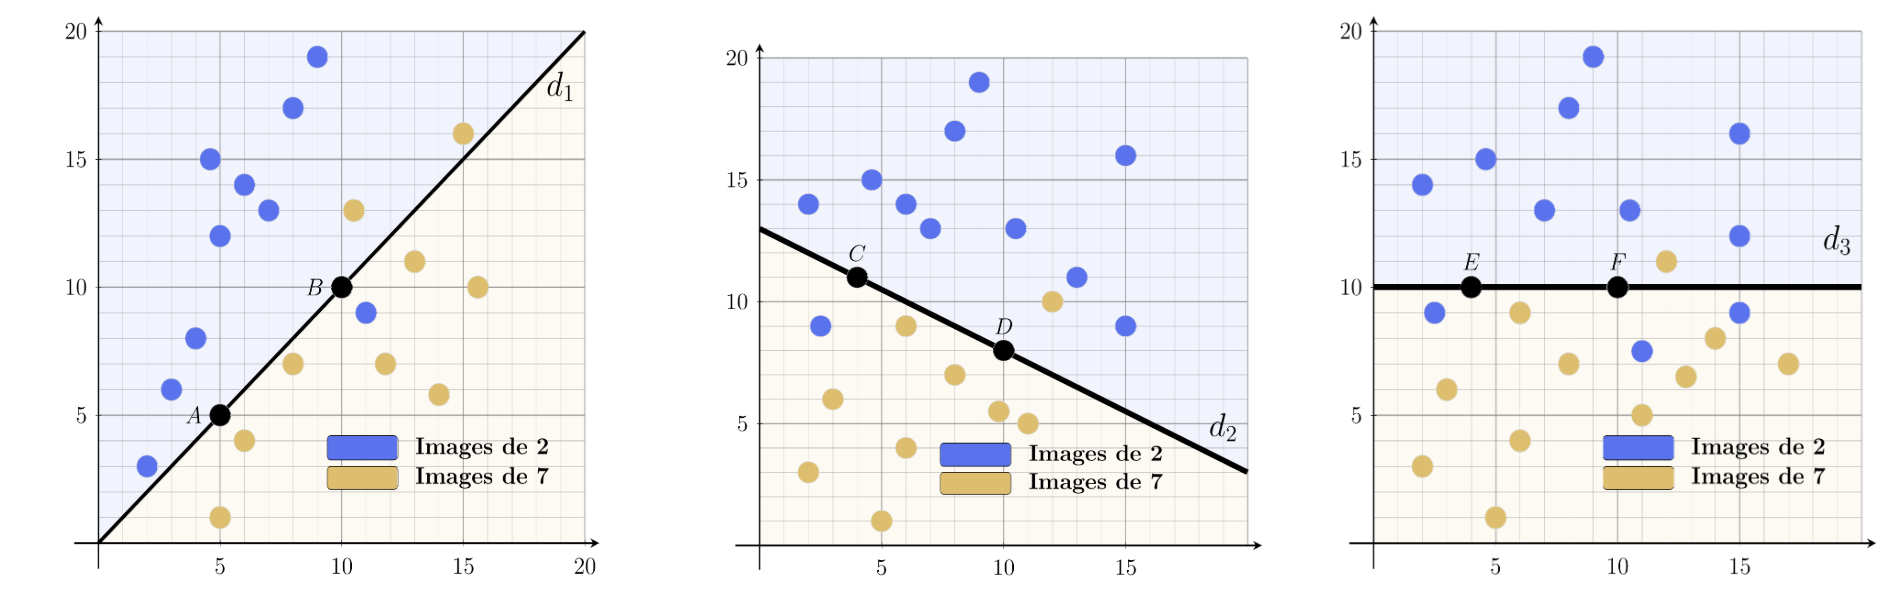

!!!


In [ ]:
qcm_association_negatif()

In [ ]:
qcm_association_positif()

In [ ]:
qcm_association_nul()

!!! info Comment l'algorithme calcule le coefficient directeur d'une droite ?
Jusqu'à maintenant, on a fait des choix sur les droites visuellement, mais l'algorithme ne peut faire que des calculs. Comment fait-il ?

Par exemple, pour calculer le coefficient directeur $m$ d'une droite, il prend deux points de la droite $A(x_A; y_A)$ et $B(x_B; y_B)$ et il calcule $m$ en utilisant la formule : $$m = \frac{y_B - y_A}{x_B - x_A}.$$

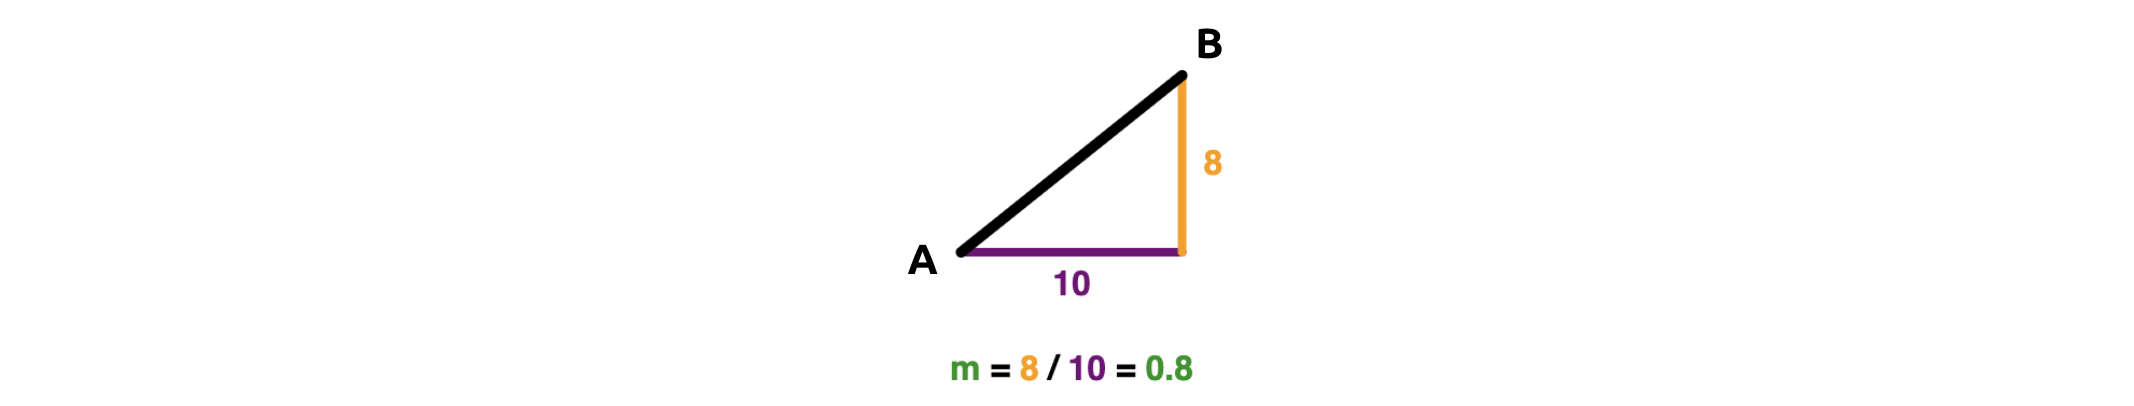

!!!


!!! question 11) Quel est le coefficient directeur de la droite ?

Détermine les coordonnées de chaque paire de points et calcule pour chaque droite le coefficient directeur en utilisant la formule.

**Remplace les `...`** dans la cellule suivante avec la valeur de chaque coefficient directeur, **puis exécute**.

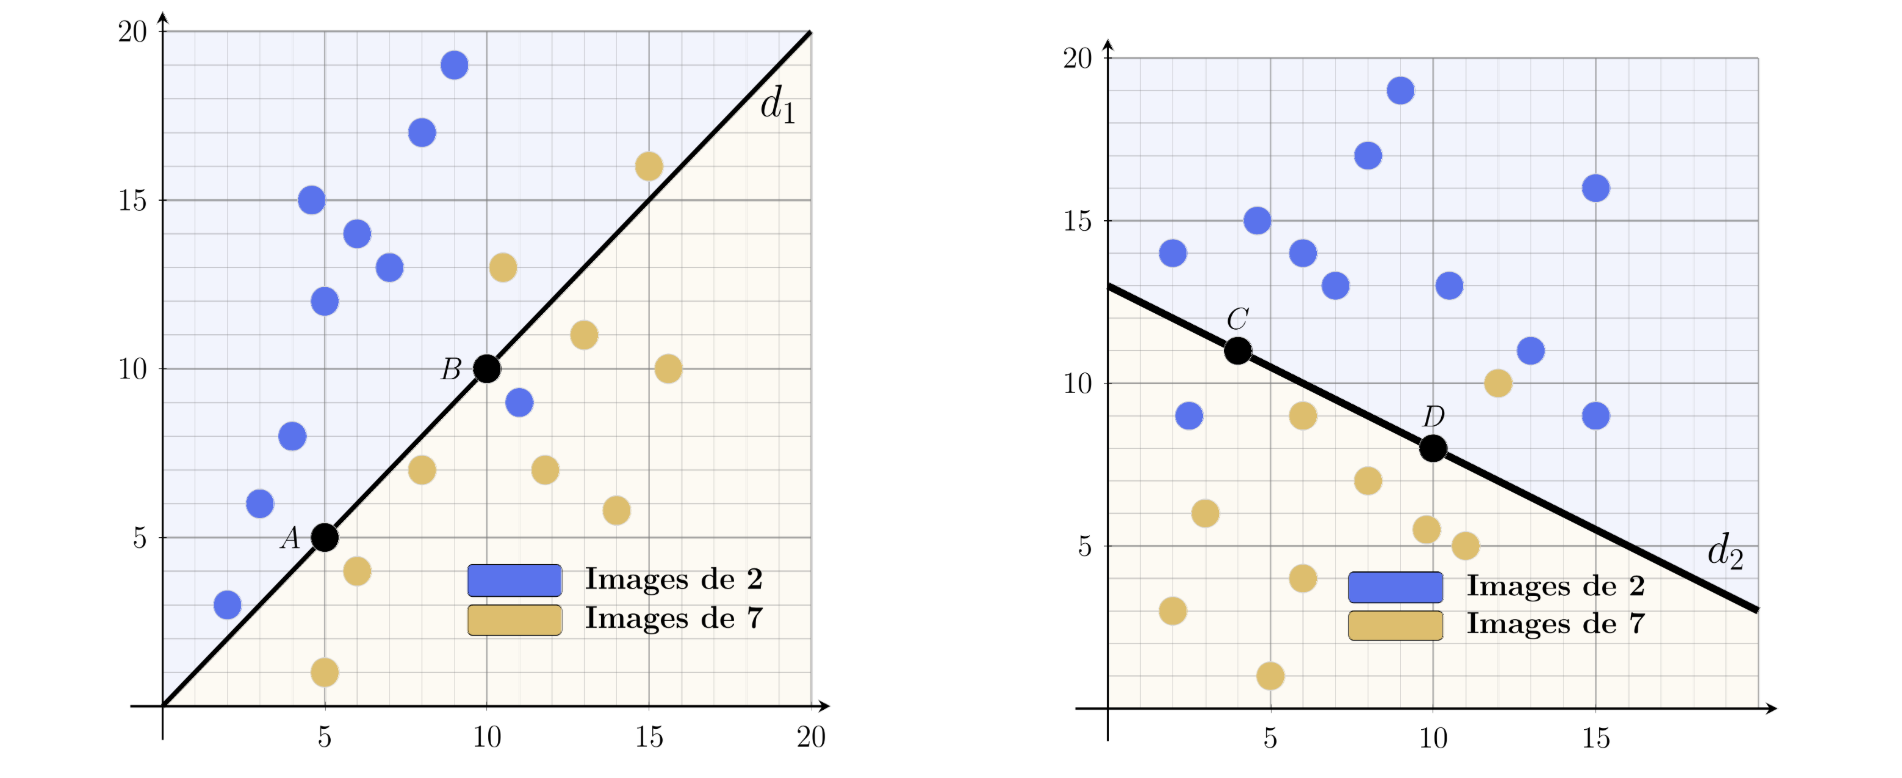

!!!


??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


In [ ]:
# coefficient directeur de d1
m1 = ...
# coefficient directeur de d2
m2 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_pente()

### Ajuster $m$ et $p$ pour diminuer l'erreur

!!! info Que représentent les points ?
Sur le graphique, **chaque point correspond à une image** de la base d’entraînement : en bleu les **2**, en orange les **7**.

L’algorithme classe les points avec une droite d’équation $y = mx + p$ :
- au-dessus de la droite → il répond **2** ;
- en-dessous de la droite → il répond **7**.

**Clique dans la cellule de code ci-dessous puis exécute-la** pour faire varier $m$ et $p$.
!!!


In [ ]:
tracer_points_droite()

validation_execution_tracer_points_droite()

!!! question 12) Trouve une droite permettant d'obtenir moins de $12\%$ d'erreur
Ajuste les paramètres $m$ et $p$ pour trouver une droite qui sépare au mieux les deux nuages de points.

**Clique dans la cellule ci-dessous puis exécute-la** pour passer à la suite.
!!!


In [ ]:
# Exécute la cellule suivante

verifier_score_droite()

!!! tip Trouver automatiquement la droite d’erreur minimum
Pour trouver une droite qui fait le moins d’erreurs sur les images d’entraînement, l’algorithme teste de nombreuses valeurs de $m$ et $p$.
À chaque essai, il calcule le pourcentage d’erreur et retient les valeurs qui donnent l’erreur **minimum**.

**Clique dans la cellule ci-dessous puis exécute-la** pour lancer cette recherche automatique.
!!!


In [ ]:
grid_search_animate()

!!! info Test sur 1 000 nouvelles images
On veut maintenant verifier que l'algorithme fait quasiement le même pourcentage d'erreur sur des nouvelles images de test qui n'ont pas ete utilisées comme exemple d'entrainement.
!!!


In [ ]:
calculer_score_droite(ensure_draw=True)
validation_execution_calculer_score_droite()

<div id="debut-etape-custom" style="height: 1px; visibility: hidden;"></div>


!!! abstract Algorithme complet avec apprentissage
En résumé, ton algorithme :
- calcule le point caractéristique $C(x_C, y_C)$ d’une image ;
- utilise une droite d’équation $y = mx + p$ pour classer : si $y_C > mx_C + p$, il répond **2**, sinon il répond **7**.

Lors de la phase d’apprentissage, il choisit les paramètres $m$ et $p$ pour obtenir un **pourcentage d’erreur minimum** sur les images d’entraînement.

Lors de la phase de test, il calcule le pourcentage d’erreur sur des **images de test** (nouvelles), qui n’ont pas servi pendant l’entraînement.

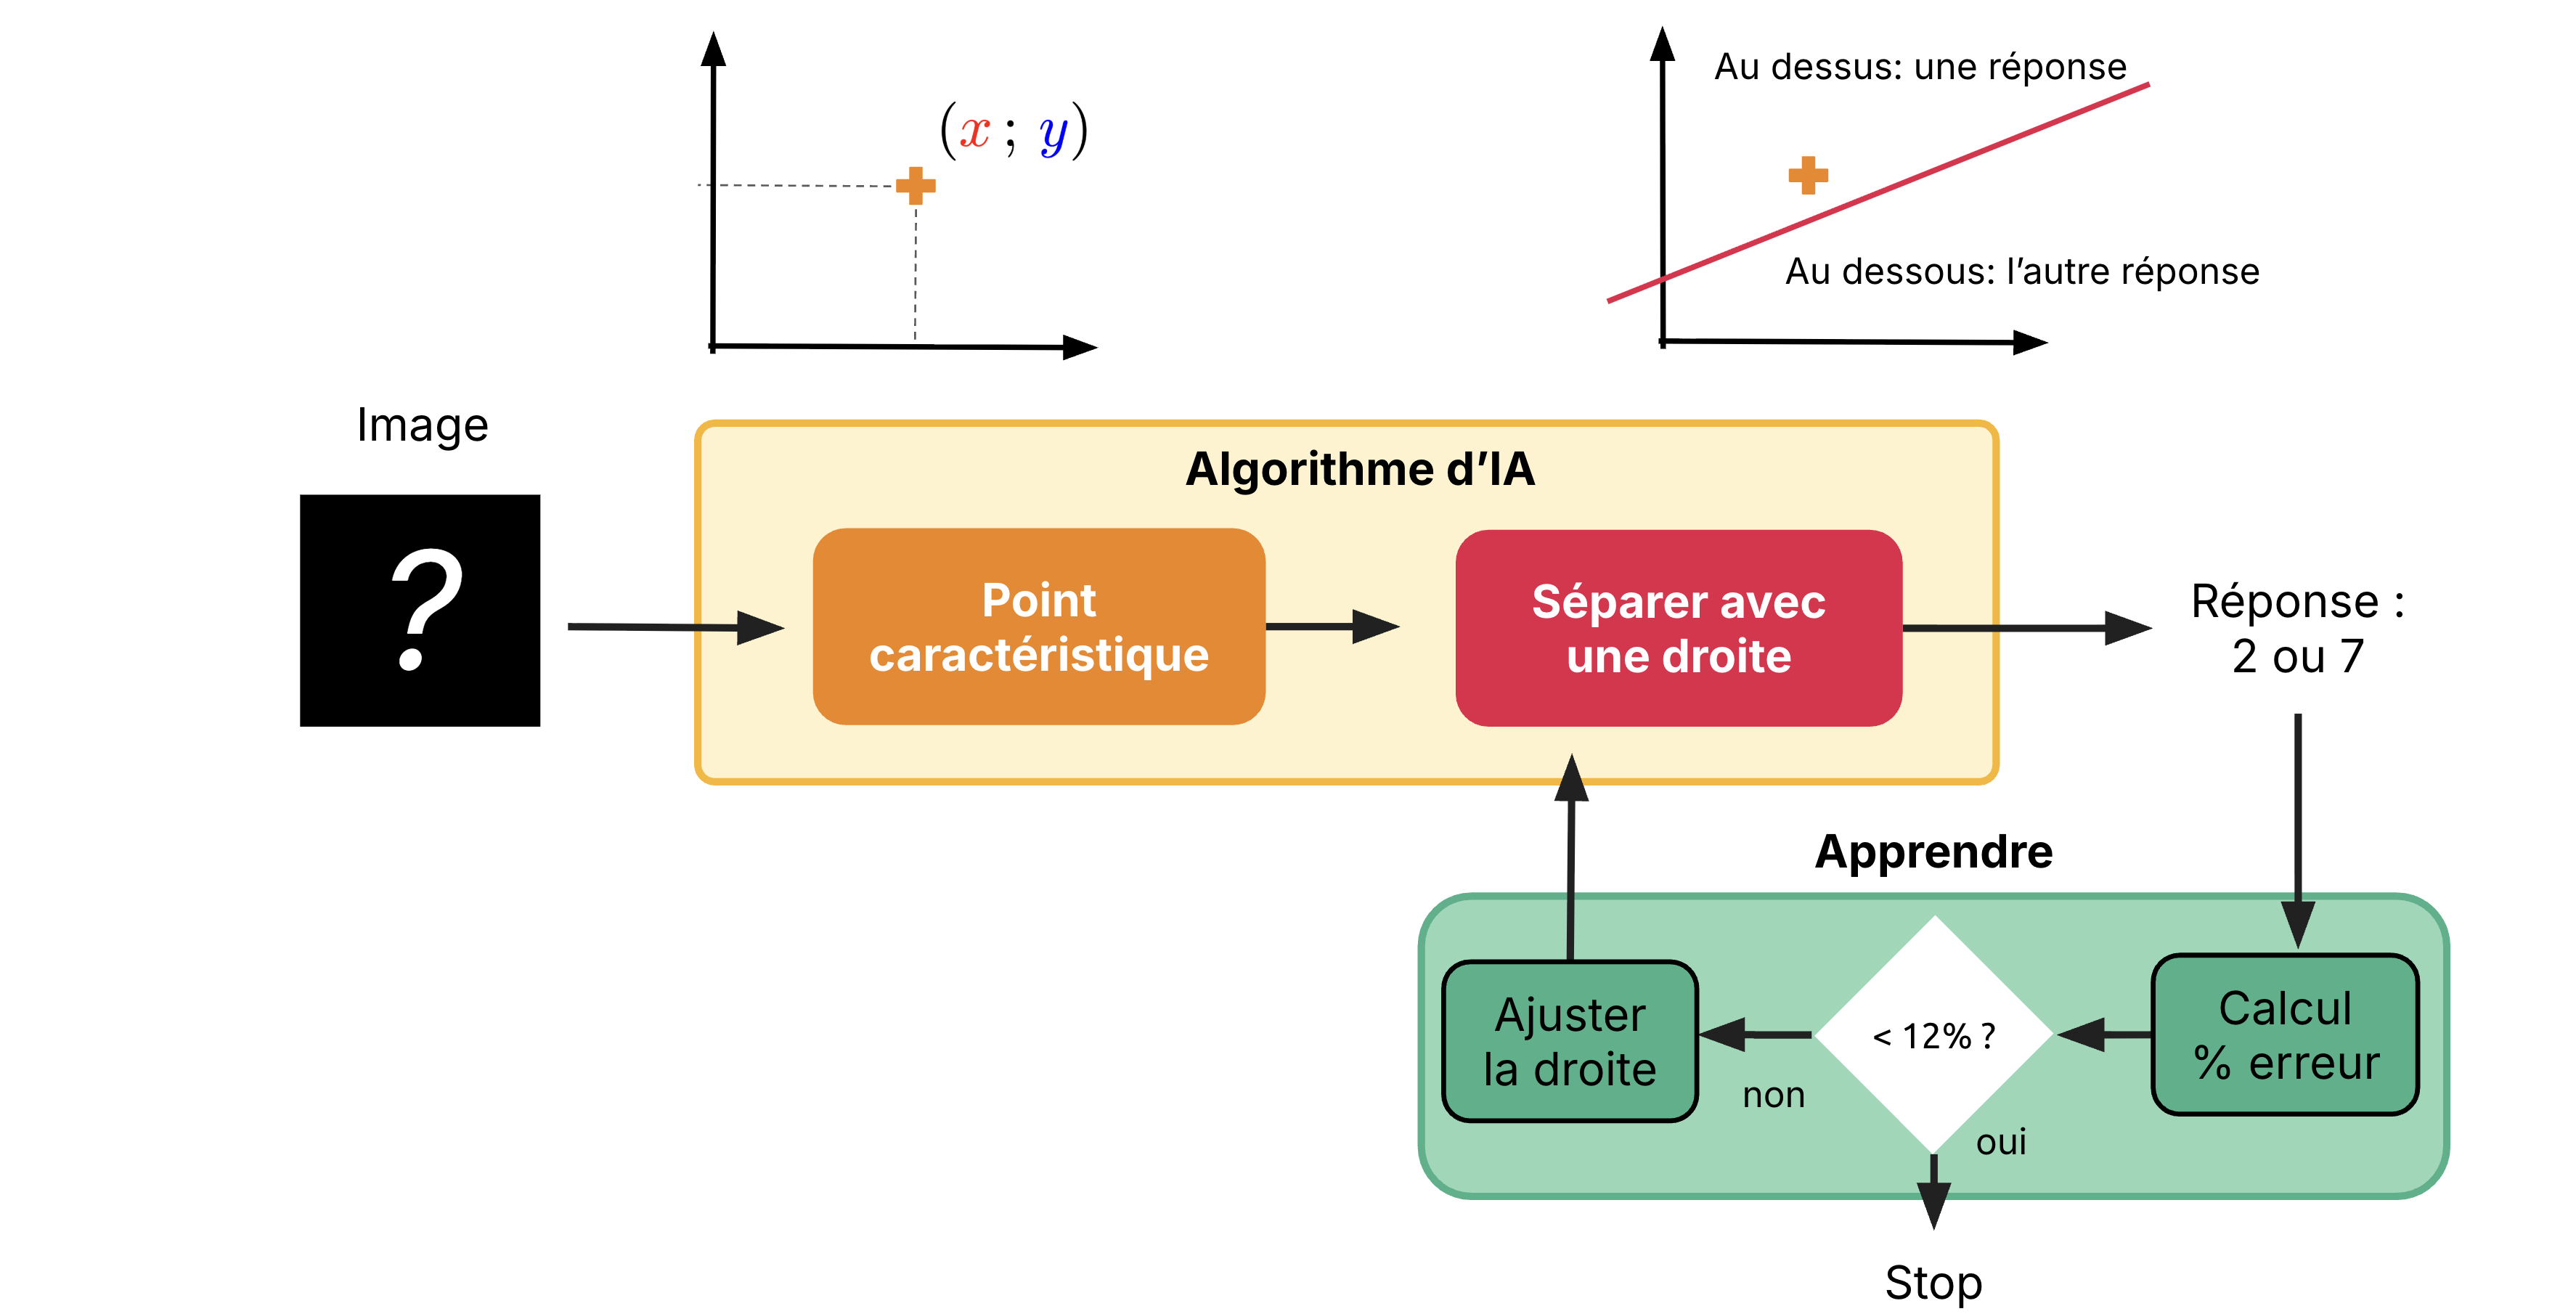

!!!


## E. Étape 5 : tes propres caractéristiques


!!! question 13) Changer les zones choisies pour définir tes propres caractéristiques
**Exécute la cellule suivante** puis sélectionne deux zones sur l’image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Clique sur le bouton *zone x* ou *zone y* pour choisir la zone à sélectionner, puis clique sur l’image et laisse appuyé jusqu'à avoir sélectionné la zone souhaitée.  
!!!


In [ ]:
afficher_customisation(enable_optimizer=True)

validation_execution_afficher_customisation()

??? warning SOS : Rien ne se passe ? Clique ici

    Avec la souris, sélectionne une zone dans une des images :   
    - clique sur *zone 2*    
    - sélectionne une zone   
    - clique sur *zone 1*  
    - sélectionne une zone  
      
    L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.
???


In [ ]:
calculer_score_custom_droite(ensure_draw=True)

??? note Complète la feuille de TP pour cette partie. 
Si tu n'as pas la feuille de TP résume ce que tu as compris sur une feuille de brouillon ou ignores ce message.
???


!!! abstract Fin du Notebook  
Dans ce TP, tu as :   
  
- Utilisé deux caractéristiques pour chaque image ;  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées ;  
- Classifié en fonction de la distance par rapport aux points de référence ;  
- Ajusté les zones pour calculer les caractéristiques et ainsi optimiser la classification et minimiser ton erreur.  
  
Continue à chercher de bonnes zones pour diminuer ton pourcentage d’erreur. Tu peux faire jusqu'à moins de 3% d’erreur !  
!!!


## Bravo tu as découvert la classification avec deux caractéristiques. 
